In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, subprocess, re
from docx import Document
from pdf2docx import Converter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')

In [12]:
# converting doc files to docx files using libre office 
# because python-docx works for only .docx not .doc which is older version
def convert_doc_to_docx(folder_path):
    doc_found = False 
    for root, _, files in os.walk(folder_path): # returns current folder, subfolders and list of files
        for file in files: # iterate over each file
            if (file.lower().endswith(".doc") and not file.lower().endswith(".docx")):
                doc_found = True
                doc_path = os.path.join(root, file) # concatenate the path
                # Convert .doc to .docx in the same folder
                try:
                    subprocess.run([
                        r'C:\Program Files\LibreOffice\program\soffice.exe',
                        '--headless',
                        '--convert-to', 'docx',
                        '--outdir', root,
                        doc_path
                    ], check=True)
                    print(f"Converted: {file} to docx")

                    # Delete the original .doc file after successful conversion
                    os.remove(doc_path)
                    print(f"{'-'*30}Removed original: {file}")

                except subprocess.CalledProcessError as e:
                    print(f"Conversion failed for {file} | Error: {e}")
    if not doc_found:
        print("No .doc file exists")

In [14]:
os.system("...")

1

In [15]:
folder = r"C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset"
convert_doc_to_docx(folder)

Converted: Peoplesoft Admin_G Ananda Rayudu.doc to docx
------------------------------Removed original: Peoplesoft Admin_G Ananda Rayudu.doc
Converted: Peoplesoft Admin_Gangareddy.doc to docx
------------------------------Removed original: Peoplesoft Admin_Gangareddy.doc
Converted: Peoplesoft Admin_Priyanka Ramadoss.doc to docx
------------------------------Removed original: Peoplesoft Admin_Priyanka Ramadoss.doc
Converted: Peoplesoft Admin_srinivasarao.doc to docx
------------------------------Removed original: Peoplesoft Admin_srinivasarao.doc
Converted: Peoplesoft Admin_Vinod Akkala.doc to docx
------------------------------Removed original: Peoplesoft Admin_Vinod Akkala.doc
Converted: PeopleSoft DBA_Ganesh Alladi.doc to docx
------------------------------Removed original: PeopleSoft DBA_Ganesh Alladi.doc
Converted: Peoplesoft Finance_Arun Venu.doc to docx
------------------------------Removed original: Peoplesoft Finance_Arun Venu.doc
Converted: Peoplesoft Finance_Pritam Biswas.doc

In [21]:
# converting pdf file to docx file
def convert_pdf_to_docx(pdf_path):
    try:
        # Define output path
        output_path = os.path.splitext(pdf_path)[0] + ".docx"

        # Convert PDF to DOCX
        cv = Converter(pdf_path)
        cv.convert(output_path, start=0, end=None) # Convert the file starting from page 0 to the last page
        cv.close()

        # Check if output was created before deleting original
        if os.path.exists(output_path):
            os.remove(pdf_path)
            print(f"Converted: {pdf_path} -----> {output_path}")
            print(f"Removed original: {pdf_path}")
        else:
            print(f"Conversion did not create output: {output_path} — original kept")

    except Exception as e:
        print(f"Conversion failed for {pdf_path}: {e}")

In [27]:
pdf_path = r'C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf'
convert_pdf_to_docx(pdf_path)

[INFO] Start to convert C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 3.95s.


Converted: C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf -----> C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.docx
Removed original: C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf


In [28]:
def extract_full_text(file_path):
    doc = Document(file_path)
    full_text = []

    # Extract paragraph text
    for para in doc.paragraphs:
        if para.text.strip(): 
            full_text.append(para.text.strip()) # remove spaces and append to list

    # Extract table text
    for table in doc.tables:
        for row in table.rows:
            row_data = [cell.text.strip() for cell in row.cells if cell.text.strip()]
            if row_data:
                 # join '|' to differenciate between table text and normal text (optional)
                full_text.append(' | '.join(row_data))

    return '\n'.join(full_text)

def process_resumes_from_folders(parent_folder):
    all_data = []
    total_files = 0
    # For each subfolder (label), read .docx files and extract text with label
    for label in os.listdir(parent_folder): 
        label_path = os.path.join(parent_folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                if file.endswith(".docx"):
                    total_files += 1
                    file_path = os.path.join(label_path, file)
                    try:
                        resume_text = extract_full_text(file_path)
                        all_data.append({'text': resume_text, 'label': label})
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
    print(f"Total .docx files found: {total_files}")
    print(f"Successfully processed: {len(all_data)}")
    return pd.DataFrame(all_data)

In [30]:
parent_folder =  r"C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx"  # Change this to your actual folder path
df = process_resumes_from_folders(parent_folder)

Error processing C:\Users\gsree\OneDrive\Desktop\DSP\P567 Dataset\P-561 Dataset\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Total .docx files found: 80
Successfully processed: 79


In [31]:
df

,text,label
0,Anubhav Kumar Singh\nTo work in a globally com...,Peoplesoft Resume
1,Profile Summary:\n7+ years of experience in im...,Peoplesoft Resume
2,PeopleSoft Database Administrator\nGangareddy\...,Peoplesoft Resume
3,Murali\nExperience Summary\nI have 6 years of ...,Peoplesoft Resume
4,"Priyanka Ramadoss\n61/46, MountPleasant,\nCoon...",Peoplesoft Resume
...,...,...
74,Workday Integration Consultant\nName :...,workday
75,Seeking suitable positions in Workday HCM as ...,workday
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday


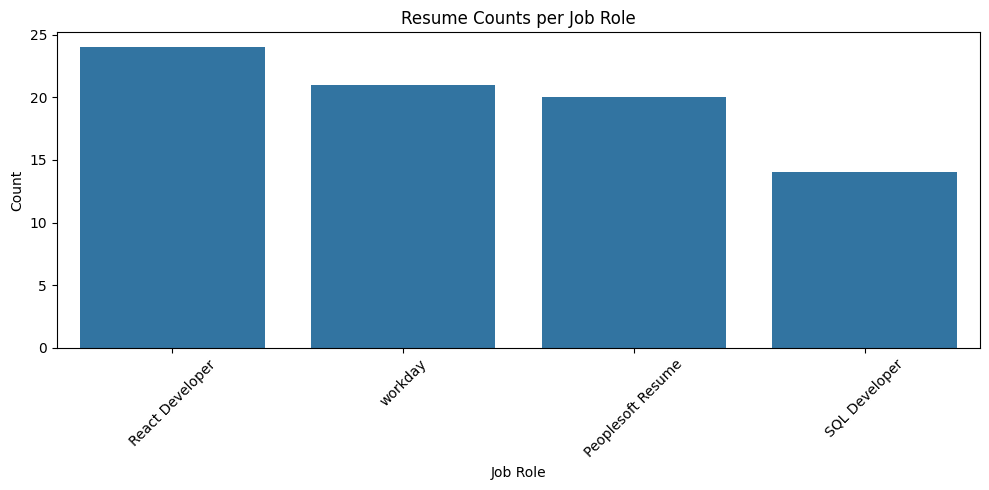

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Resume Counts per Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.tight_layout()

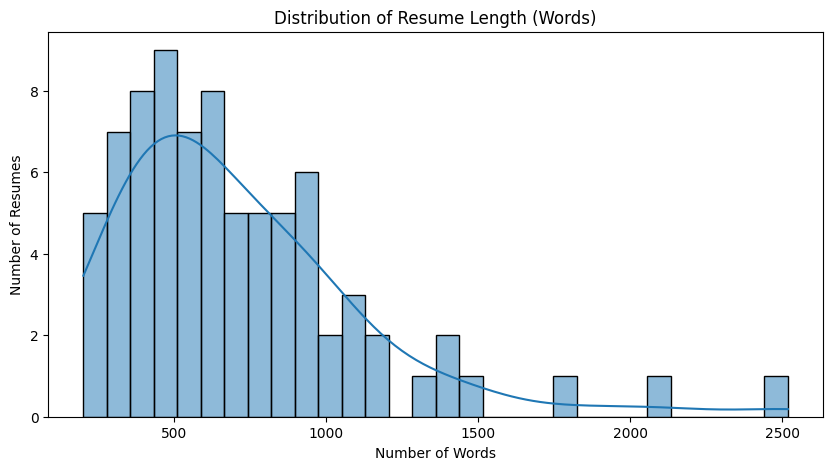

In [33]:
text_length = df['text'].apply(lambda x: len(x.split())) # gives the word count of the resume

plt.figure(figsize=(10,5))
sns.histplot(text_length, bins=30, kde=True)
plt.title('Distribution of Resume Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Resumes');

In [34]:
df

,text,label
0,Anubhav Kumar Singh\nTo work in a globally com...,Peoplesoft Resume
1,Profile Summary:\n7+ years of experience in im...,Peoplesoft Resume
2,PeopleSoft Database Administrator\nGangareddy\...,Peoplesoft Resume
3,Murali\nExperience Summary\nI have 6 years of ...,Peoplesoft Resume
4,"Priyanka Ramadoss\n61/46, MountPleasant,\nCoon...",Peoplesoft Resume
...,...,...
74,Workday Integration Consultant\nName :...,workday
75,Seeking suitable positions in Workday HCM as ...,workday
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday


In [38]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet's multilingual data


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gsree\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gsree\AppData\Roaming\nltk_data...


True

In [40]:
''' 
    Full Form:
    "PS": "PeopleSoft"
    "WF": "WorkFlow"
    "WD": "Workday"
    "PL/SQL": "Procedural Language SQL"
    "CI/CD": "Continuous Integration and Continuous Delivery"
    "ETL" : "Extract-Load-Transform"
    "SOAP" : "Simple Object Access Protocol"
    "JSON" : "JavaScript Object Notation"
'''
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Known skills as per resume skills, converted to lowercase to match lowercased text
known_skills = {
    "sql", "ps", "wf", "react", "js", "wd", "api", "db", "etl", "ai",
    "pl/sql", "html", "css", "aws", "json", "rest", "soap", "ci/cd",
}

def clean_text(text):
    # Remove non-letters and lowercase
    text = re.sub('[^a-zA-Z]', ' ', text) # keep only capital and small alphabets
    text = text.lower() 
    
    # Tokenize
    words = text.split()
    
    # Lemmatize words except known skills, also remove stopwords
    cleaned_words = [
        word if word in known_skills else lemma.lemmatize(word)
        for word in words
        if word not in stop_words
    ]
    return ' '.join(cleaned_words)

In [41]:
df['clean_text'] = df['text'].apply(clean_text)

In [42]:
df['text'][0][0:100]

'Anubhav Kumar Singh\nTo work in a globally competitive environment on\nchallenging assignments that sh'

In [43]:
df['clean_text'][0][0:100]

'anubhav kumar singh work globally competitive environment challenging assignment shall yield twin be'

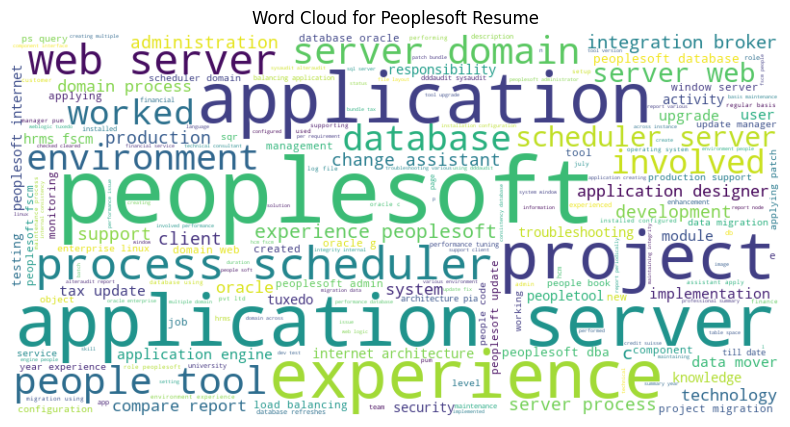

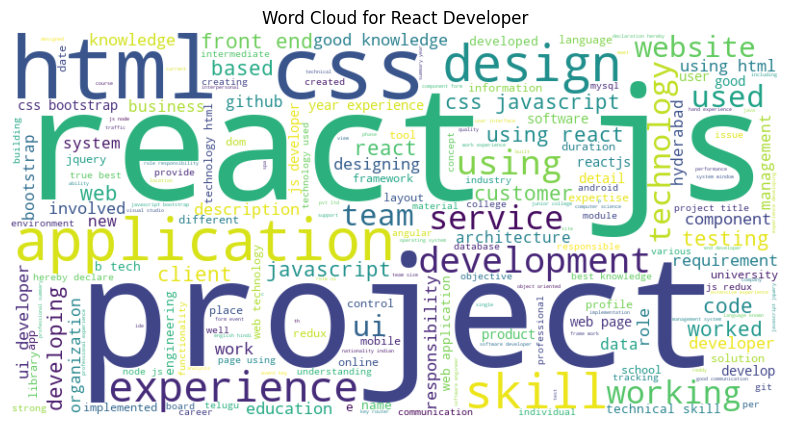

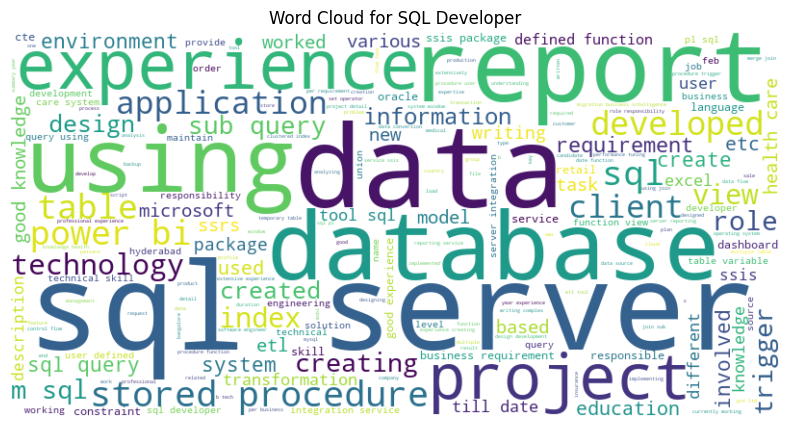

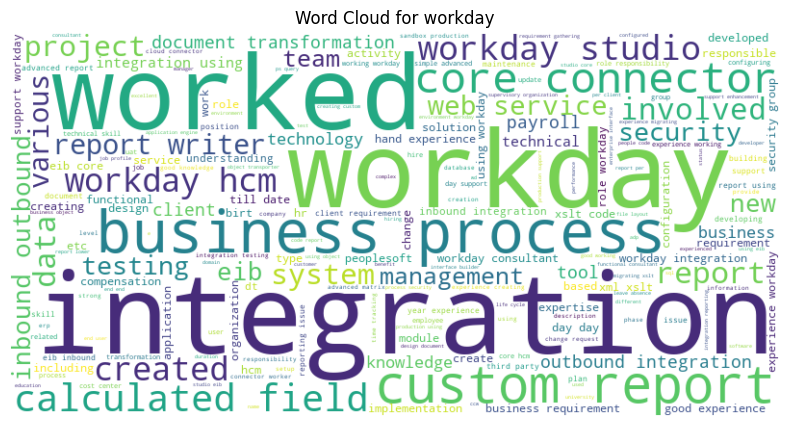

In [44]:
labels = df['label'].unique() # get all unique labels
for label in labels: # loop through each unique class
    text = ' '.join(df[df['label'] == label]['clean_text'].values) # combine all text for that label
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')

In [45]:
df

,text,label,clean_text
0,Anubhav Kumar Singh\nTo work in a globally com...,Peoplesoft Resume,anubhav kumar singh work globally competitive ...
1,Profile Summary:\n7+ years of experience in im...,Peoplesoft Resume,profile summary year experience implementing u...
2,PeopleSoft Database Administrator\nGangareddy\...,Peoplesoft Resume,peoplesoft database administrator gangareddy p...
3,Murali\nExperience Summary\nI have 6 years of ...,Peoplesoft Resume,murali experience summary year experience work...
4,"Priyanka Ramadoss\n61/46, MountPleasant,\nCoon...",Peoplesoft Resume,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday Integration Consultant\nName :...,workday,workday integration consultant name sri krishn...
75,Seeking suitable positions in Workday HCM as ...,workday,seeking suitable position workday hcm techno f...
76,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...,workday,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday,venkateswarlu b workday consultant year experi...
